In [1]:
from matplotlib import pyplot as plt
import json 
import os

In [2]:
CHK_PTS = [19, 39, 59, 79, 99, 119, 139, 159, 179, 199, 219, 239, 259, 279, 299]
LRS = ['/'] * 10 
NAMES = [f'vae_1e-4/split{i:02d}' for i in range(10)]
VAL_FILES = ['light_x_minus', 'light_x_plus', 'light_y_minus', 'light_y_plus', 'light_z_minus', 'light_z_plus']

6 307
6 302
6 317
6 324
6 351
6 371
6 367
6 378
6 403
6 415
6 415
5 343
0 0
0 0
0 0


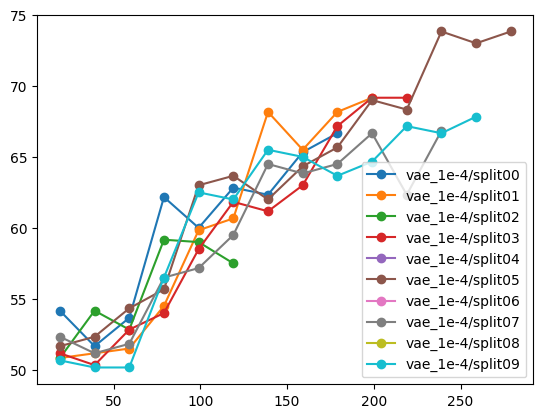

In [3]:

outputs = []
for version in range(10):
    lr = LRS[version]
    name = NAMES[version]
    current_corrected = []
    for chk_pt in CHK_PTS:
        count_corrected = 0
        meet = 0
        for val_dir in VAL_FILES:
            for version_id in range(3):
                dir_path = f"../../output/20240730/val_axis/{name}/{lr}/chk{chk_pt}/{val_dir}/lightning_logs/version_{version_id}/"
                json_path = dir_path + '/scores.json'
                if os.path.exists(json_path):
                    meet += 1
                    with open(json_path) as f:
                        data = json.load(f)
                        count_corrected += len(data['corrected'])
                    break
        if version == 3:
            print(meet, count_corrected)
        if count_corrected == 0 or meet < 6:
            continue
        count_corrected /= 6
        current_corrected.append(count_corrected)
    #outputs.append((name, lr, current_corrected))
    plt.plot(CHK_PTS[:len(current_corrected)], current_corrected,   "o-", label=f"{name}")
plt.legend()
plt.show()

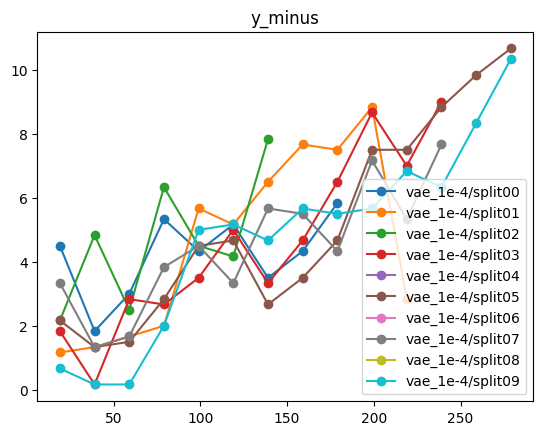

In [4]:

outputs = []
for version in range(10):
    lr = LRS[version]
    name = NAMES[version]
    current_corrected = []
    for chk_pt in CHK_PTS:
        count_corrected = 0
        meet = 0
        for val_dir in ['light_y_minus']:
            for version_id in range(3):
                dir_path = f"../../output/20240730/val_axis/{name}/{lr}/chk{chk_pt}/{val_dir}/lightning_logs/version_{version_id}/"
                json_path = dir_path + '/scores.json'
                if os.path.exists(json_path):
                    meet += 1
                    with open(json_path) as f:
                        data = json.load(f)
                        count_corrected += len(data['corrected'])
                    break
        if count_corrected == 0:
            continue
        count_corrected /= 6
        current_corrected.append(count_corrected)
    #outputs.append((name, lr, current_corrected))
    plt.plot(CHK_PTS[:len(current_corrected)], current_corrected,   "o-", label=f"{name}")
plt.title("y_minus")
plt.legend()
plt.show()

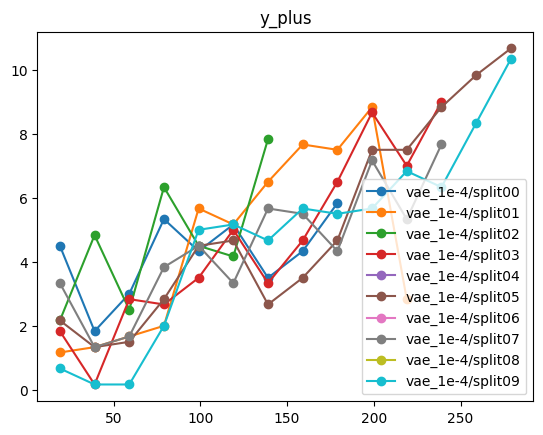

In [5]:

outputs = []
for version in range(10):
    lr = LRS[version]
    name = NAMES[version]
    current_corrected = []
    for chk_pt in CHK_PTS:
        count_corrected = 0
        meet = 0
        for val_dir in ['light_y_minus']:
            for version_id in range(3):
                dir_path = f"../../output/20240730/val_axis/{name}/{lr}/chk{chk_pt}/{val_dir}/lightning_logs/version_{version_id}/"
                json_path = dir_path + '/scores.json'
                if os.path.exists(json_path):
                    meet += 1
                    with open(json_path) as f:
                        data = json.load(f)
                        count_corrected += len(data['corrected'])
                    break
        if count_corrected == 0:
            continue
        count_corrected /= 6
        current_corrected.append(count_corrected)
    #outputs.append((name, lr, current_corrected))
    plt.plot(CHK_PTS[:len(current_corrected)], current_corrected,   "o-", label=f"{name}")
plt.title("y_plus")
plt.legend()
plt.show()

In [ ]:

outputs = []
for version in range(10):
    lr = LRS[version]
    name = NAMES[version]
    current_corrected = []
    for chk_pt in CHK_PTS:
        count_corrected = 0
        meet = 0
        for val_dir in VAL_FILES:
            for version_id in range(3):
                dir_path = f"../../output/20240730/val_axis/{name}/{lr}/chk{chk_pt}/{val_dir}/lightning_logs/version_{version_id}/"
                json_path = dir_path + '/scores.json'
                if os.path.exists(json_path):
                    meet += 1
                    with open(json_path) as f:
                        data = json.load(f)
                        count_corrected += len(data['corrected'])
                    break
        if version == 3:
            print(meet, count_corrected)
        if count_corrected == 0 or meet < 6:
            continue
        count_corrected /= 6
        current_corrected.append(count_corrected)
    #outputs.append((name, lr, current_corrected))
    plt.plot(CHK_PTS[:len(current_corrected)], current_corrected, label=f"{name}")
plt.legend()
plt.show()

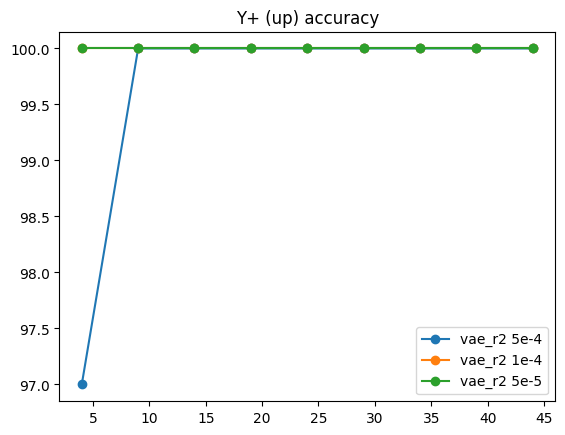

In [15]:

outputs = []
#VAL_FILES = ['light_x_minus', 'light_x_plus', 'light_y_minus', 'light_y_plus', 'light_z_minus', 'light_z_plus']
VAL_FILES = ['light_y_plus']
CHK_PTS = [4, 9, 14, 19, 24, 29, 34, 39, 44]
for version in range(3):
    lr = LRS[version]
    name = NAMES[version]
    current_corrected = []
    for chk_pt in CHK_PTS:
        count_corrected = 0
        try:
            for val_dir in VAL_FILES:
                dir_path = f"../../output/20240726/val_axis/{name}/{lr}/chk{chk_pt}/{val_dir}/lightning_logs/version_0/"
                with open(dir_path + '/scores.json') as f:
                    data = json.load(f)
                    count_corrected += len(data['corrected'])
            count_corrected /= len(VAL_FILES)
            current_corrected.append(count_corrected)
        except:
            current_corrected.append(0)
    outputs.append((name, lr, current_corrected))
    x = []
    y = []
    for i in range(len(current_corrected)):
        if current_corrected[i] > 0.5:
            x.append(CHK_PTS[i])
            y.append(current_corrected[i])
    plt.plot(x, y,  "o-", label=f"{name} {lr}")
plt.title('Y+ (up) accuracy')
plt.legend()
plt.show()

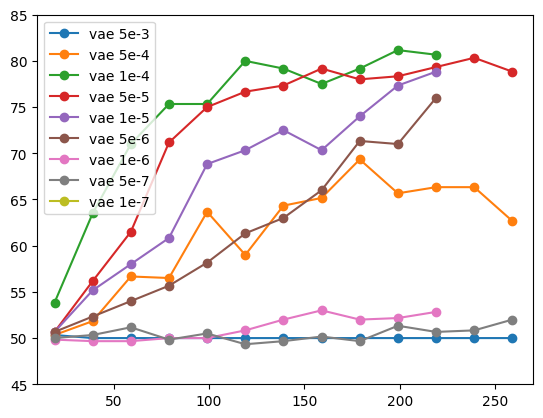

In [31]:

outputs = []
plt.ylim(45, 85)
plt.xlim(10, 270)
for version in [3, 4, 9,  5, 10, 11, 12, 13, 14]:
    lr = LRS[version]
    name = NAMES[version]
    current_corrected = []
    for chk_pt in CHK_PTS:
        count_corrected = 0
        for val_dir in VAL_FILES:
            dir_path = f"../../output/20240703/val_axis/{name}/{lr}/chk{chk_pt}/{val_dir}/lightning_logs/version_0/"
            with open(dir_path + '/scores.json') as f:
                data = json.load(f)
                count_corrected += len(data['corrected'])
        count_corrected /= 6
        current_corrected.append(count_corrected)
    outputs.append((name, lr, current_corrected))
    x = []
    y = []
    for i in range(len(current_corrected)):
        if current_corrected[i] > 0.5:
            x.append(CHK_PTS[i])
            y.append(current_corrected[i])
    plt.plot(x, y,  "o-", label=f"{name} {lr}")
plt.legend()
plt.show()

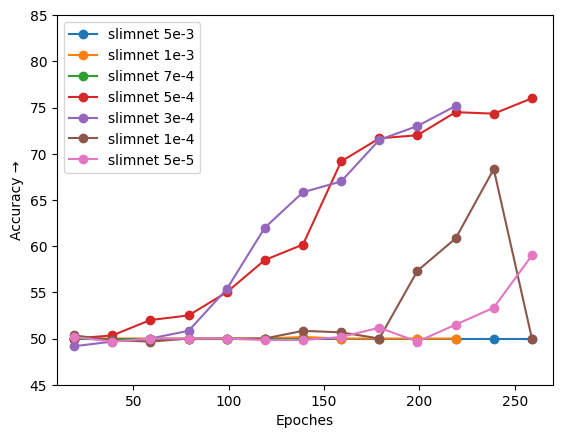

In [32]:

outputs = []
plt.ylim(45, 85)
plt.xlim(10, 270)
for version in [6,15,17,7,18,16,8]:
    lr = LRS[version]
    name = NAMES[version]
    current_corrected = []
    for chk_pt in CHK_PTS:
        count_corrected = 0
        for val_dir in VAL_FILES:
            try:
                dir_path = f"../../output/20240703/val_axis/{name}/{lr}/chk{chk_pt}/{val_dir}/lightning_logs/version_0/"
                with open(dir_path + '/scores.json') as f:
                    data = json.load(f)
                    count_corrected += len(data['corrected'])
            except:
                count_corrected += 0
        count_corrected /= 6
        current_corrected.append(count_corrected)
    outputs.append((name, lr, current_corrected))
    x = []
    y = []
    for i in range(len(current_corrected)):
        if current_corrected[i] > 10:
            x.append(CHK_PTS[i])
            y.append(current_corrected[i])
    plt.plot(x, y,  "o-", label=f"{name} {lr}")
plt.ylabel("Accuracy →")
plt.xlabel("Epoches")
plt.legend()
plt.show()

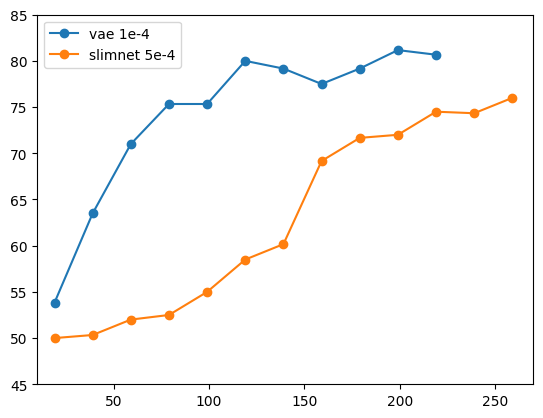

In [33]:

outputs = []
plt.ylim(45, 85)
plt.xlim(10, 270)
for version in [9, 7]:
    lr = LRS[version]
    name = NAMES[version]
    current_corrected = []
    for chk_pt in CHK_PTS:
        count_corrected = 0
        for val_dir in VAL_FILES:
            dir_path = f"../../output/20240703/val_axis/{name}/{lr}/chk{chk_pt}/{val_dir}/lightning_logs/version_0/"
            with open(dir_path + '/scores.json') as f:
                data = json.load(f)
                count_corrected += len(data['corrected'])
        count_corrected /= 6
        current_corrected.append(count_corrected)
    outputs.append((name, lr, current_corrected))
    x = []
    y = []
    for i in range(len(current_corrected)):
        if current_corrected[i] > 0.5:
            x.append(CHK_PTS[i])
            y.append(current_corrected[i])
    plt.plot(x, y,  "o-", label=f"{name} {lr}")
plt.legend()
plt.show()

In [34]:
count_corrected = 0
for val_dir in VAL_FILES:
    try:
        dir_path = f"../../output/20240703/val_axis_control/vae/5e-5/chk299/g5.00/lightning_logs/version_1/face_light/{val_dir}"
        with open(dir_path + '/scores.json') as f:
            data = json.load(f)
            count_corrected += len(data['corrected'])
            print(len(data['corrected']))
    except:
        count_corrected += 0
count_corrected /= 6
print(count_corrected)

100
100
90
100
100
0
81.66666666666667


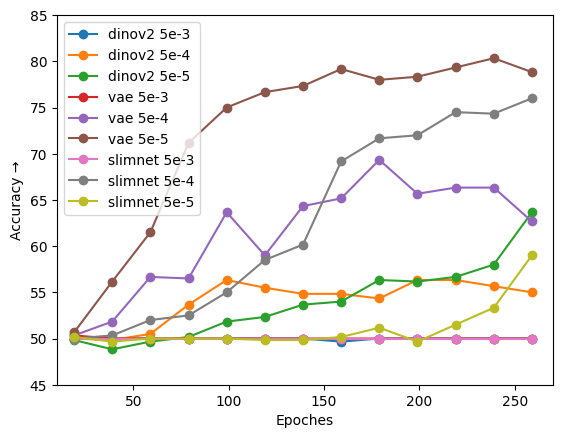

In [26]:

outputs = []
plt.ylim(45, 85)
plt.xlim(10, 270)
for version in range(9):
    lr = LRS[version]
    name = NAMES[version]
    current_corrected = []
    for chk_pt in CHK_PTS:
        count_corrected = 0
        for val_dir in VAL_FILES:
            try:
                dir_path = f"../../output/20240703/val_axis/{name}/{lr}/chk{chk_pt}/{val_dir}/lightning_logs/version_0/"
                with open(dir_path + '/scores.json') as f:
                    data = json.load(f)
                    count_corrected += len(data['corrected'])
            except:
                count_corrected += 0
        count_corrected /= 6
        current_corrected.append(count_corrected)
    outputs.append((name, lr, current_corrected))
    x = []
    y = []
    for i in range(len(current_corrected)):
        if current_corrected[i] > 10:
            x.append(CHK_PTS[i])
            y.append(current_corrected[i])
    plt.plot(x, y,  "o-", label=f"{name} {lr}")
plt.ylabel("Accuracy →")
plt.xlabel("Epoches")
plt.legend()
plt.show()

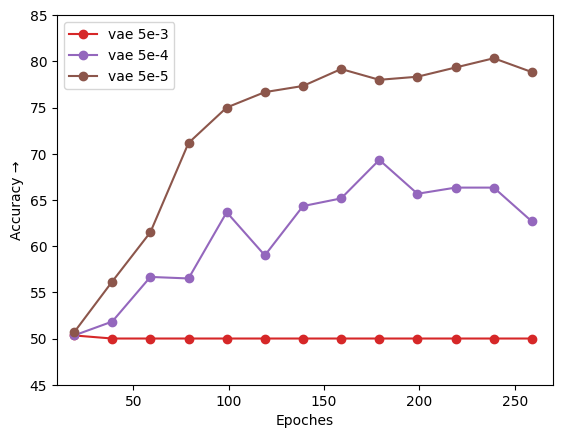

In [29]:

outputs = []
plt.ylim(45, 85)
plt.xlim(10, 270)
for version in range(3):
    plt.plot([0], [0])
for version in range(3,6):
    lr = LRS[version]
    name = NAMES[version]
    current_corrected = []
    for chk_pt in CHK_PTS:
        count_corrected = 0
        for val_dir in VAL_FILES:
            try:
                dir_path = f"../../output/20240703/val_axis/{name}/{lr}/chk{chk_pt}/{val_dir}/lightning_logs/version_0/"
                with open(dir_path + '/scores.json') as f:
                    data = json.load(f)
                    count_corrected += len(data['corrected'])
            except:
                count_corrected += 0
        count_corrected /= 6
        current_corrected.append(count_corrected)
    outputs.append((name, lr, current_corrected))
    x = []
    y = []
    for i in range(len(current_corrected)):
        if current_corrected[i] > 10:
            x.append(CHK_PTS[i])
            y.append(current_corrected[i])
    plt.plot(x, y,  "o-", label=f"{name} {lr}")
plt.ylabel("Accuracy →")
plt.xlabel("Epoches")
plt.legend()
plt.show()